#                                        A predictive DASH QoE approach based on machine learning at Multi-Access Edge Computing 

## Abstract
Network operators expected to run on with fast-growing multimedia video streaming (e.g., DASH) traffic demand while providing a high Quality of Experience (QoE) to the end-users. The cost, complexity, and scalability of existing QoE estimation solutions have significant limitations to infer QoE from network traffic. However, this works provides an end-user QoE estimation method based on a predictive passive QoE probe mechanism of DASH mobile video using a Machine Learning (ML) approach running at network edge nodes. We describe the design and implementation of probe configuration at the target edge, with traffic flow monitoring to generate network-level Quality of Service (QoS) metrics. Moreover, build a QoS-QoE correlation ML model in realtime fashion for detecting patterns of the user equipment traffic behavior to predict user QoE.

## Introductution

According to a recent study and forecast, global internet video streaming (\textit{e.g.,} DASH) traffic accounted for 70\% of the total internet traffic in 2017 \cite{cisco2018cisco}. In 2021, it has expected to reach 82\% of the entire internet traffic with immense growth rates of video traffic. Therefore,  it gives a challenge to both content providers  and network operators to consistently deliver a great experience to their end-users, known as Quality of Experience (QoE). Content providers have direct access to video quality from the user end. Yet, network operators only have access to network traffic from the end-user device or network element for measuring quality. So-called passive probes (\textit{e.g.,} middle-box or virtual function ) used to extract and process traffic information sent over the network — further, that information used for QoE estimation. 

Since network operators have no access to encrypted traffic and assess QoE at the client-side, therefore, present client level QoE monitoring or network level passive monitoring by Deep Packet Inspection (DPI) is not workable for network operators. As an emerging QoE driven architecture, the Multi-access Edge Computing  (MEC)  \cite{hu2015mobile}  leverage the edge computing concept providing low latency and high bandwidth requirements at edge facilities. Beyond the content caching work at edge facilities \cite{barakabitze2019qoe} to optimize the video delivery, to date, no study has conducted to estimate/predict QoE by a predictive passive probe running at network edge facilities to meet the immense demand for video traffic.

This work proposes a method to predict and estimate the objective QoE Key Performance Indicators (KPIs) of target end-users based on passive traffic monitoring at edge facilities near to the target user. For this, we deploy a predictive passive probe mechanism at an edge facility where edge acts as a sink for the corresponding network Quality of Service (QoS)  metrics (\textit{e.g.,} throughput, delay, loss, etc.) of the end-users. After that,  offline and online analysis based on Machine Learning (ML) is used as an estimate/predict objective video QoE KPIs (\textit{e.g.,} video resolution, stall, MOS, etc.). This QoE prediction helps network operators correlate network traffic with video quality to overcome QoE degradation. 
## Workflow

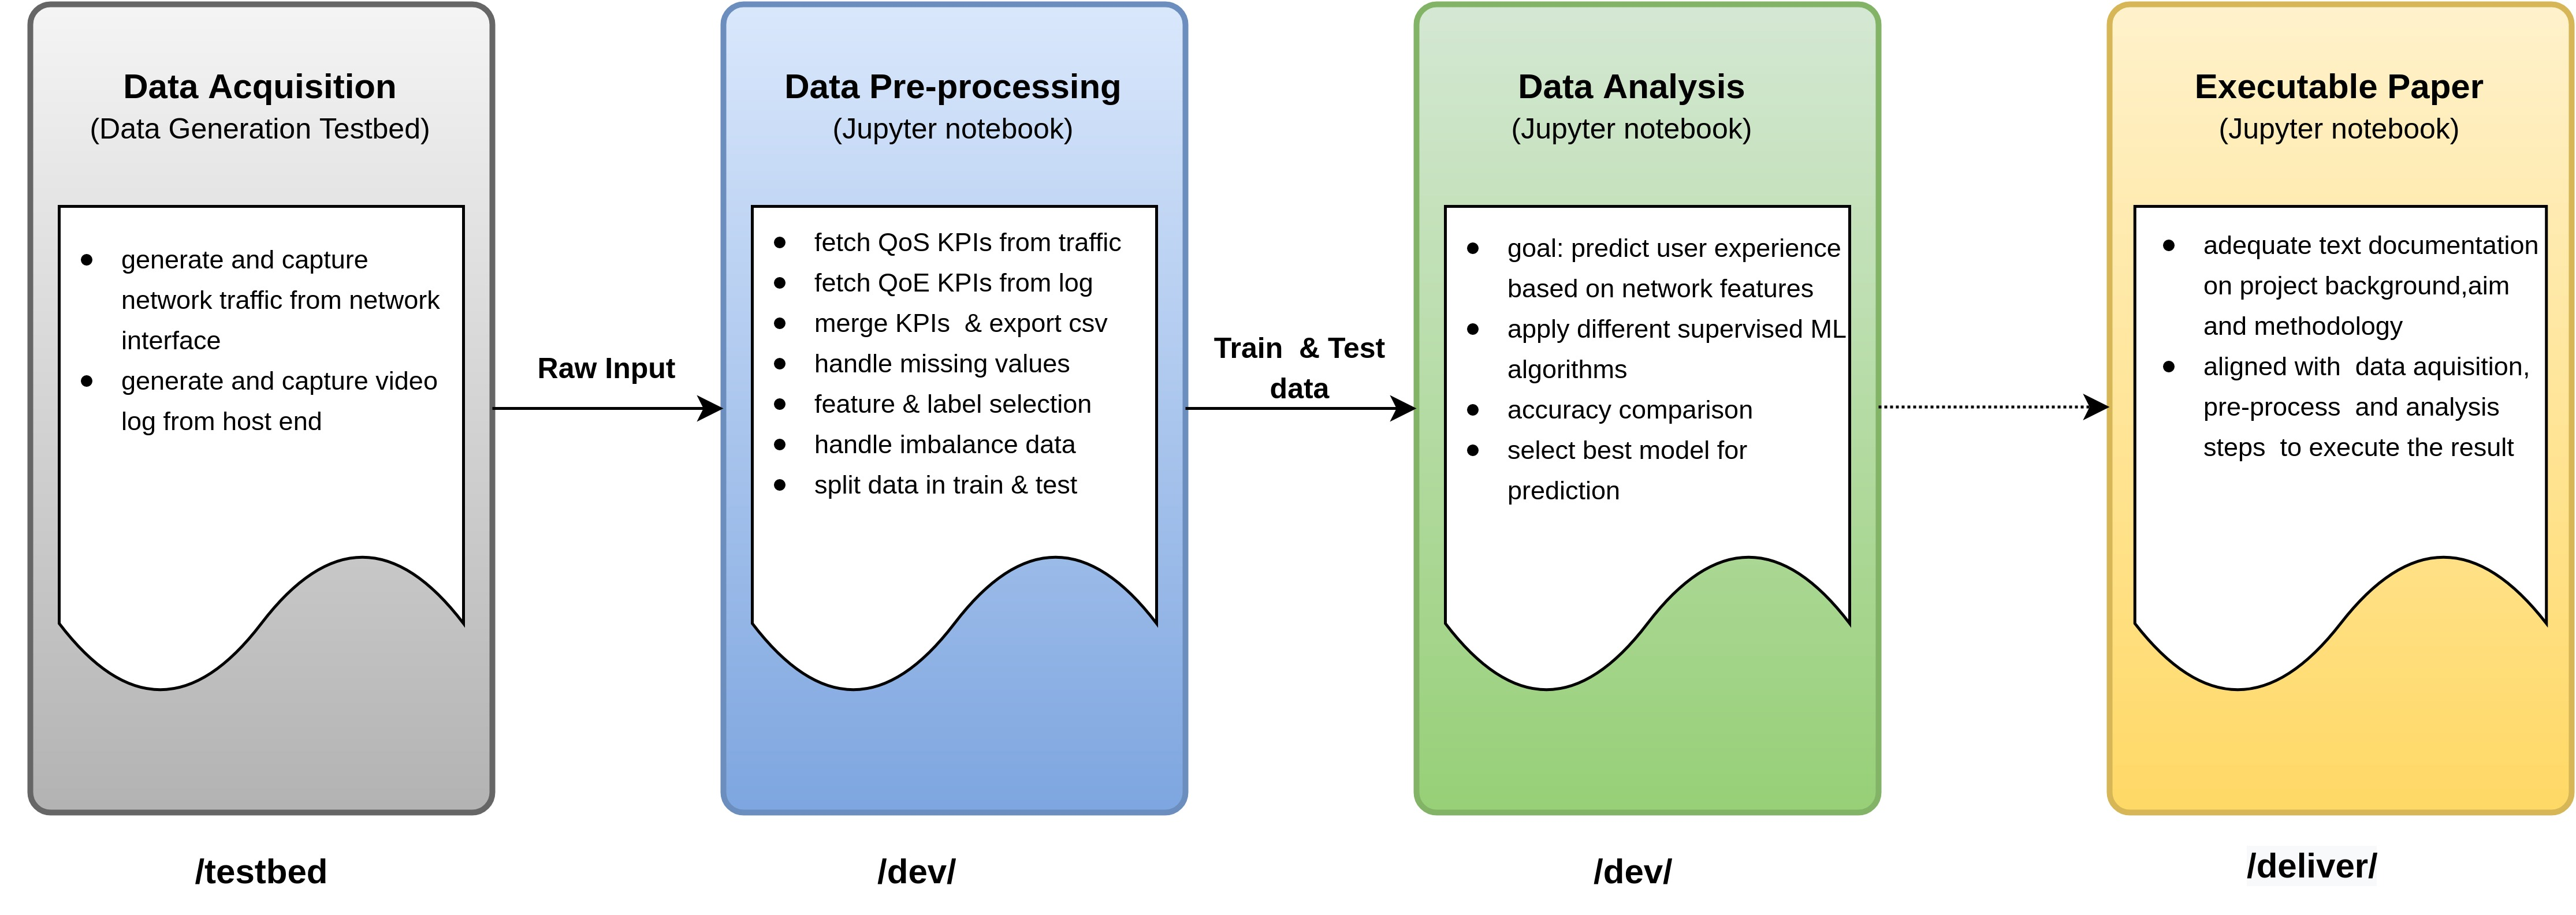

In [9]:
from IPython.display import Image
Image("/home/loop/reproducible-research-IA369Z/figures/Project_workflow.jpg")

# [Testbed Design and Implementation](https://github.com/sajibtariq/reproducible-research-IA369Z/tree/master/testbed)

This work aims to propose a method based on the deployment of a predictive QoE probe mechanism to allow network operators to estimate users’ QoE at edge facilities without user cooperation and on path middle-box processing. The edge probe periodically collects the bi-direction network traffic (\textit{e.g.,} QoS) and predicts users QoE. Figure 1 presents a high-level network scenario for the QoE estimator probe compound with end-user,  access network, core network, internet, and video server. Besides, access point will serve as edge computing use to run a network monitoring probe. Our design and implementation based on four components: (i)emulated network infrastructure with Mininet-WiFi\cite{fontes2015mininet} (ii)tcpdump packet sniffer agent for passive QoS metrice monitoring at access point (iii)godash\cite{reviakin2018dashc} player video QoE KPIs log file as ground truth (iv)supervised ML model to predict QoE based on QoS features. In general, ML models predict QoE either offline or online.  In an offline approach, the entire video session traffic use as both features and labels to classify the video session.  In the online (real-time) strategy, a particular time window video session  traffic features use to predict the QoE of that time window.  Offline analytic helps to network operators for proactive better network capacity planning and configuration. Online analytic helps network orchestrator or controller for taking run-time action (\textit{e.g.,} QoE-centric re-routing) to optimize QoE. In this work we will go for online/realtime QoE prediction aprroach. The DASH video  works by breaking the video media file into a sequence of small HTTP-based file segments, each segment containing a short interval of playback time of a video with different encoding bitrates, video frame rates, video resolutions, etc. In this work we will build a ML model based on per segment QoS (e.g, delay, throughput) and QoE (e.g, video resolution, MOS). We used the network architecture scenario depicted in 1 using Mininet-WiFi along with dynamic network conditions (3g, 4g, and 5g tracess downlink throughput) for the entire video session. Where a different group of the station used as a client, and they linked to the access point (AP). A Caddy\footnote{https://caddyserver.com} web server host the animation video Big Buck Bunny(BBB) split into small segments (10-second duration) with different bitrates and resolutions linked with the Open vSwitch. A lightweight DASH compatible video streaming tool called goDASH used in client-side to play the video. It provides an adequate video streaming log file (including stall, quality, and  ITU-T P.1203 MOS\cite{raake2017bitstream}) for further analysis. During the emulation to extract network-level QoS metrics, we captured the network traffic at an access point interface with tcpdump. The video session for the entire experiment for a different group of client and dynamic  network conditions run up to 10 minutes. 


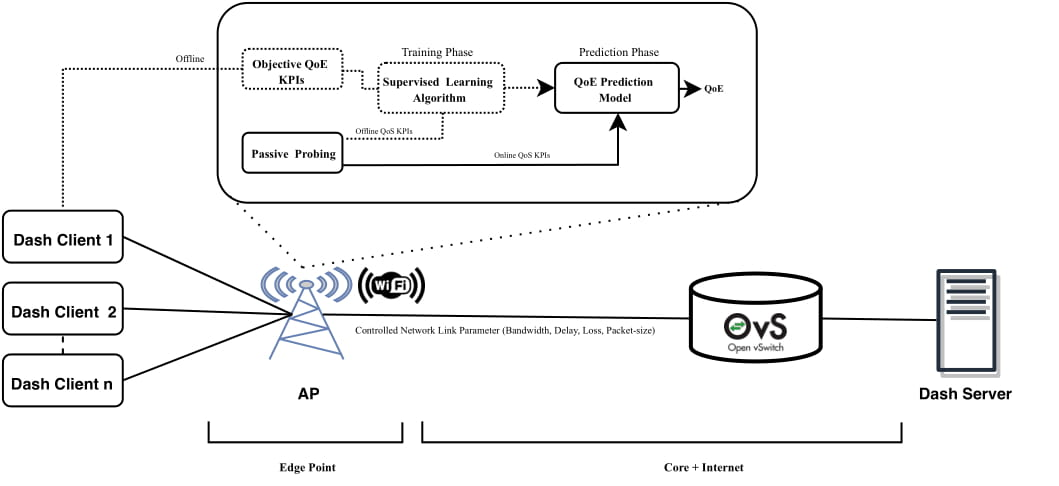

In [11]:
Image("/home/loop/reproducible-research-IA369Z/figures/net-1.jpg")

# Data Preprocess

After collectiong raw network data and video log we implemnted a python script that fetch each video video segment QoS metrics (e,g, RTT, throughput, packets) and QoE metrics (e.g, stalls, quality, MOS). Then merge all the metrics and export as CSV file
## Import module

In [18]:
%run ./module.ipynb

Using TensorFlow backend.


In [17]:
#%run ./Raw-data-preprocess-&-csv-export.ipynb

## Load dataset 
Three classes for MOS value; 
poor (1) = 1 - 2 ;
average (2) = 2 - 3 ;
good (3)= 3- 5 ;

In [19]:
data = pd.read_csv('~/reproducible-research-IA369Z/data/Final_conventional.csv')

def class_l(x):

    if(x['MOS']>=1 and x['MOS']<2):
        return '1'  # poor
    if(x['MOS']>=2 and x['MOS']<3 ):
        return '2' # average
    if(x['MOS']>=3 and x['MOS']<5 ):
        return '3' # good
    
data=data.assign(mos=data.apply(class_l, axis=1)) 

data.head(5)

,Type,Mobility,Operator,Trace,Total host,Client,Algorithm,Port,Segment,RTT,Throughput,Packets,MOS,Stall Duration,Rep_level,Byte Size,Buffer level,Width,Height,mos
0,3g,metro,Am,1.0,1,1,conv,58428,1,0.014,22659.514093,183,1.878,0,237,361713,10000,320,180,1
1,3g,metro,Am,1.0,1,1,conv,58432,2,59.723,8985.608897,219,1.878,0,237,348932,20000,320,180,1
2,3g,metro,Am,1.0,1,1,conv,58436,3,0.015,22692.006057,135,1.878,0,237,232527,17928,320,180,1
3,3g,metro,Am,1.0,1,1,conv,58440,4,328.707,65282.761561,148,1.886,0,237,347702,19861,320,180,1
4,3g,metro,Am,1.0,1,1,conv,58444,5,140.111,85331.063518,98,1.886,0,237,236167,25988,320,180,1


(3591, 20)


3    2046
2     968
1     577
Name: mos, dtype: int64

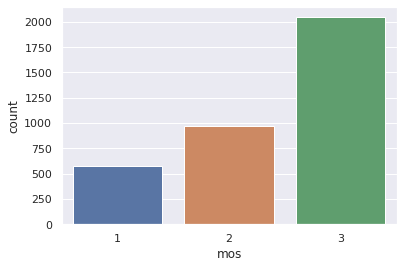

In [20]:
data=data.dropna() #drop entire row due to missing value
data['mos'].value_counts()
sns.set(style="darkgrid")
p = sns.countplot(data=data, x = 'mos')
print(data.shape)
data['mos'].value_counts()

## Select features (X) and target (y)

In [21]:
feature=data.loc[:,data.columns.isin(['RTT','Throughput','Packets'])]#3
#X=X1.iloc[0:1725]
target=data.loc[:,data.columns.isin(['mos'])]#3
target.columns= ['mos']
#y=y1.iloc[0:1725]
#y=y1.iloc[0:1725]

## Dataset balance

Under-sampling: Remove samples from over-represented classes ; use this if you have huge dataset Over-sampling: Add more samples from under-represented classes; use this if you have small dataset SMOTE (Synthetic Minority Over-sampling Technique) SMOTE is an over-sampling method. It creates synthetic samples of the minority class. We use imblearn python package to over-sample the minority classes .

(6138, 3) (6138, 1)


3    2046
2    2046
1    2046
Name: mos, dtype: int64

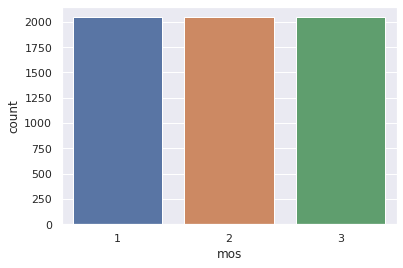

In [22]:
feature.shape
target.shape
smote=SMOTE(random_state=42) # resample all class same
X, y=smote.fit_resample(feature,target)
print(X.shape, y.shape)

sns.set(style="darkgrid")
sns.countplot(data=y, x = 'mos')
y['mos'].value_counts()

## Split dataset into training and testing

In [23]:
X_train, X_test,y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

# Data analysis 

##  Grid search

Applied gird search along-with k-fold cross validation to tune the best parameter for each of the different supervised ML algorithms.

In [ ]:
#%run ./grid_search.ipynb

## Model accuracy comparision

LR: 0.549430 (0.023558)
KNN: 0.687368 (0.016743)
DTC: 0.706558 (0.011707)
GNB: 0.572236 (0.023920)
SVM: 0.581653 (0.021302)
RFC: 0.738419 (0.019002)
MLP: 0.474679 (0.057391)


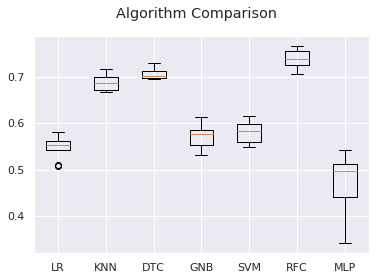

In [26]:
import warnings
warnings.filterwarnings('ignore')
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []

models.append(('LR', LogisticRegression())) #LogisticRegression()
models.append(('KNN', KNeighborsClassifier())) #KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier())) #DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('MLP', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('box.eps')
plt.show()

## Select Random Forest as final model presiction

Accuracy of our RF classification  model is : 0.7280
Classification Report

              precision    recall  f1-score   support

           1       0.76      0.78      0.77       204
           2       0.67      0.63      0.65       210
           3       0.75      0.78      0.76       200

    accuracy                           0.73       614
   macro avg       0.73      0.73      0.73       614
weighted avg       0.73      0.73      0.73       614

Confusion matrix, without normalization
[[159  33  12]
 [ 38 133  39]
 [ 11  34 155]]
Normalized confusion matrix
[[0.78 0.16 0.06]
 [0.18 0.63 0.19]
 [0.06 0.17 0.78]]


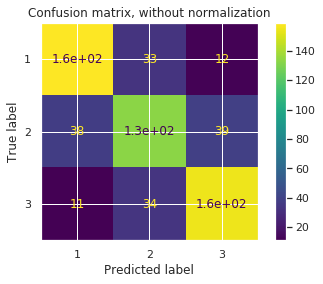

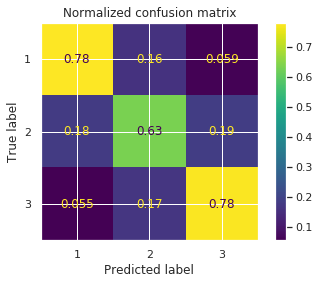

In [27]:
from sklearn.metrics import plot_confusion_matrix
model = RandomForestClassifier()

model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)


accuracy = metrics.accuracy_score(y_test, y_pred)

print ("Accuracy of our RF classification  model is : {0:.4f}".format(accuracy))


print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred,labels=['1','2','3'])))


#print ("Confusion Matrix")
# labels for set 1=True to upper left and 0 = False to lower right
#print ("{0}".format(metrics.confusion_matrix(y_test, y_pred,labels=['1','2','3'])))
##print(y_test['mos'].value_counts())


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test, display_labels=['1','2','3'],
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig('books_read.pdf')
plt.show()